In [38]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pandas as pd

## Load, Aggregate, and Shape Data into Train and Test Sets

In [39]:
### CURRENTLY ONLY FOR THE 2018 SEASON !!! EASY TO EXPAND ###

yCSV = pd.read_csv("Y_data.csv")
xCSV = pd.read_csv("avypro_training_data.csv")

# Match input data to output data by date.
data = pd.merge(xCSV, yCSV, how='inner')
data.fillna(0)
# Separate back into Y and X data.
Y_data = data.iloc[:, 60:74]
X_data = data.iloc[:, 1:60]

In [40]:
Y_data.head()

size  likelihood  type  atl  ntl  btl  N  NE  E  SE  S  SW  W  NW
0     2           1     1    1    1    1  1   1  1   1  0   0  0   1
1     2           1     2    1    1    1  1   0  0   0  0   0  0   0
2     2           1     1    1    1    1  1   1  1   1  0   0  0   1
3     2           2     1    2    2    2  1   1  1   1  1   0  0   1
4     2           1     1    1    1    1  1   1  1   1  1   1  1   1

In [41]:
X_data.head()

weasd         air     albedo     lftx4     ccond  cfrzr  cicep  \
0   3.689453  273.513881  22.041667  4.069513  0.001121    0.0    0.0   
1   4.183485  273.840542  22.519445  6.945900  0.001442    0.0    0.0   
2   5.218750  274.311788  26.236112  4.398923  0.001194    0.0    0.0   
3  21.324544  271.524231  38.084722  4.569698  0.000942    0.0    0.0   
4  26.901476  271.461487  40.956945  7.268658  0.001065    0.0    0.0   

      crain     csnow       cape  ...       vstm      vwnd     wcinc  \
0  0.069444  0.194444   2.638889  ...   1.761612  3.812396  0.142164   
1  0.000000  0.027778   0.000000  ...   8.467294  4.556467  0.001873   
2  0.055556  0.069444   0.833333  ...  20.272773  5.771789  0.033427   
3  0.111111  0.625000  12.916667  ... -12.230935  2.061167  0.303431   
4  0.152778  0.361111   2.638889  ... -25.905458  1.417704  0.022783   

     wcconv         wcvflx        wcuflx     wvinc    wvconv        wvvflx  \
0  0.269016   27053.009778  52298.722222  0.295112 -0.852878  5.023065e+05   
1  0.099577   12529.501956  18176.009222  0.003210 -0.012544  4.664435e+05   
2  0.495635   50384.602000  29193.199222  0.063256  0.913484  1.029357e+06   
3  0.181651  -18458.371111  82082.132222  0.644174  0.571547 -2.571857e+05   
4  0.034756 -106715.221111  95791.171111 -0.002071 -1.273638 -1.669190e+06   

         wvuflx  
0  9.125842e+05  
1  3.961722e+05  
2  4.004341e+05  
3  8.055341e+05  
4  1.650360e+06  

[5 rows x 59 columns]

In [42]:
# Copy the data over to new df.
X_scaled = X_data.copy()
X_scaled = X_scaled.fillna(0)

# Normalize our features.
# for column in X_scaled.columns:
#     X_scaled[column] = (X_scaled[column] -
#                         X_scaled[column].mean()) / X_scaled[column].std()
scaler = StandardScaler()
scaler.fit(X_scaled)
X_scaled = scaler.transform(X_scaled)
X_scaled = pd.DataFrame(X_scaled)
X_scaled = X_scaled.fillna(0)
X_scaled.head()
print(X_scaled.shape)
print(Y_data.shape)

(578, 59)
(578, 14)


In [43]:
# Split data into training and testing subsets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_data, test_size=0.30)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(404, 59)
(174, 59)
(404, 14)
(174, 14)


## Generate SVM OneVsRest Models

### Size

In [44]:
# Isolate size feature and generate model.
y_size = y_train['size']
size_model = svm.SVC()
size_ovr = OneVsRestClassifier(size_model).fit(X_train, y_size)
size_preds = size_ovr.predict(X_test)
size_preds

array([1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 0, 2, 1, 1, 1, 1],
      dtype=int64)

In [45]:
# Calculate accuracy with y_test.
accuracy_score(y_test['size'], size_preds)


0.632183908045977

### Likelihood

In [46]:
# Isolate likelihood feature and generate model.
y_likelihood = y_train['likelihood']
likelihood_model = svm.SVC()
likelihood_ovr = OneVsRestClassifier(likelihood_model).fit(X_train, y_likelihood)
likelihood_preds = likelihood_ovr.predict(X_test)
likelihood_preds

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1,
       1, 0, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 3, 1, 1, 1, 1],
      dtype=int64)

In [47]:
# Calculate accuracy with y_test.
accuracy_score(y_test['likelihood'], likelihood_preds)

0.6264367816091954

### Problem Type

In [48]:
# Isolate problem type feature and generate model.
y_type = y_train['type']
type_model = svm.SVC()
type_ovr = OneVsRestClassifier(type_model).fit(X_train, y_type)
type_preds = type_ovr.predict(X_test)
type_preds

array([1, 3, 0, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 2,
       0, 0, 1, 1, 3, 1, 0, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1],
      dtype=int64)

In [49]:
# Calculate accuracy with y_test.
accuracy_score(y_test['type'], type_preds)

0.6896551724137931

### Above Treeline Risk

In [50]:
# Isolate atl feature and generate model.
y_atl = y_train['atl']
atl_model = svm.SVC()
atl_ovr = OneVsRestClassifier(atl_model).fit(X_train, y_atl)
atl_preds = atl_ovr.predict(X_test)
atl_preds

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1,
       1, 0, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1],
      dtype=int64)

In [51]:
# Calculate accuracy with y_test.
accuracy_score(y_test['atl'], atl_preds)

0.6436781609195402

### Near Treeline Risk

In [52]:
# Isolate ntl feature and generate model.
y_ntl = y_train['ntl']
ntl_model = svm.SVC()
ntl_ovr = OneVsRestClassifier(ntl_model).fit(X_train, y_ntl)
ntl_preds = ntl_ovr.predict(X_test)
ntl_preds

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1,
       1, 0, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1],
      dtype=int64)

In [53]:
# Calculate accuracy with y_test.
accuracy_score(y_test['ntl'], ntl_preds)

0.632183908045977

### Below Treeline Risk

In [54]:
# Isolate atl feature and generate model.
y_btl = y_train['btl']
btl_model = svm.SVC()
btl_ovr = OneVsRestClassifier(btl_model).fit(X_train, y_btl)
btl_preds = btl_ovr.predict(X_test)
btl_preds

array([1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 0,
       0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0,
       1, 3, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 3, 1, 1,
       1, 1, 0, 1, 1, 3, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1,
       1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0,
       0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 3, 0, 0, 1, 0],
      dtype=int64)

In [55]:
# Calculate accuracy with y_test.
accuracy_score(y_test['btl'], btl_preds)

0.6839080459770115

### Aspect

In [56]:
y_train.head()

size  likelihood  type  atl  ntl  btl  N  NE  E  SE  S  SW  W  NW
47      2           2     1    2    2    2  1   1  1   1  0   0  1   1
129     1           2     3    2    2    2  1   1  1   1  1   1  1   1
358     1           1     1    1    1    1  1   1  1   1  1   1  1   1
133     1           1     1    1    1    1  1   1  1   1  0   0  0   1
353     2           3     1    3    3    3  1   1  1   1  0   0  0   1

In [57]:
aspect = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

In [58]:
# Format test set.
y_train_asp = y_train.iloc[:, 6:14]
y_test_asp = y_test.iloc[:, 6:14]

for feature in aspect:
    model = svm.SVC()
    model.fit(X_train, y_train_asp[feature])
    preds = model.predict(X_test)
    score = accuracy_score(y_test[feature], preds)
    print(feature + ": ", score)

N:  0.9080459770114943
NE:  0.867816091954023
E:  0.867816091954023
SE:  0.867816091954023
S:  0.7758620689655172
SW:  0.7931034482758621
W:  0.7528735632183908
NW:  0.9252873563218391


Decision Tree Classifier

Avalanche Size

[Text(0.571580762987013, 0.9666666666666667, 'X[55] <= 0.329\ngini = 0.595\nsamples = 404\nvalue = [80, 222, 102]'),
 Text(0.2080965909090909, 0.9, 'X[34] <= -0.977\ngini = 0.547\nsamples = 346\nvalue = [79, 212, 55]'),
 Text(0.025974025974025976, 0.8333333333333334, 'X[3] <= -1.984\ngini = 0.136\nsamples = 69\nvalue = [1, 64, 4]'),
 Text(0.012987012987012988, 0.7666666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.03896103896103896, 0.7666666666666667, 'X[32] <= -2.116\ngini = 0.086\nsamples = 67\nvalue = [1, 64, 2]'),
 Text(0.025974025974025976, 0.7, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.05194805194805195, 0.7, 'X[48] <= 1.573\ngini = 0.059\nsamples = 66\nvalue = [0, 64, 2]'),
 Text(0.03896103896103896, 0.6333333333333333, 'X[46] <= -1.71\ngini = 0.03\nsamples = 65\nvalue = [0, 64, 1]'),
 Text(0.025974025974025976, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.05194805194805195, 0.5666666666666667, 'gini = 0.0\nsamples 

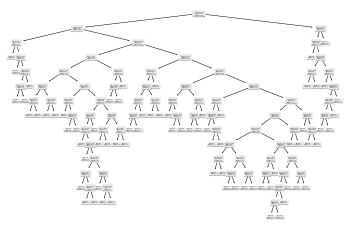

In [59]:
from sklearn import tree
from six import StringIO
import graphviz

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_size)
tree_size_pred = clf.predict(X_test)
tree.plot_tree(clf)


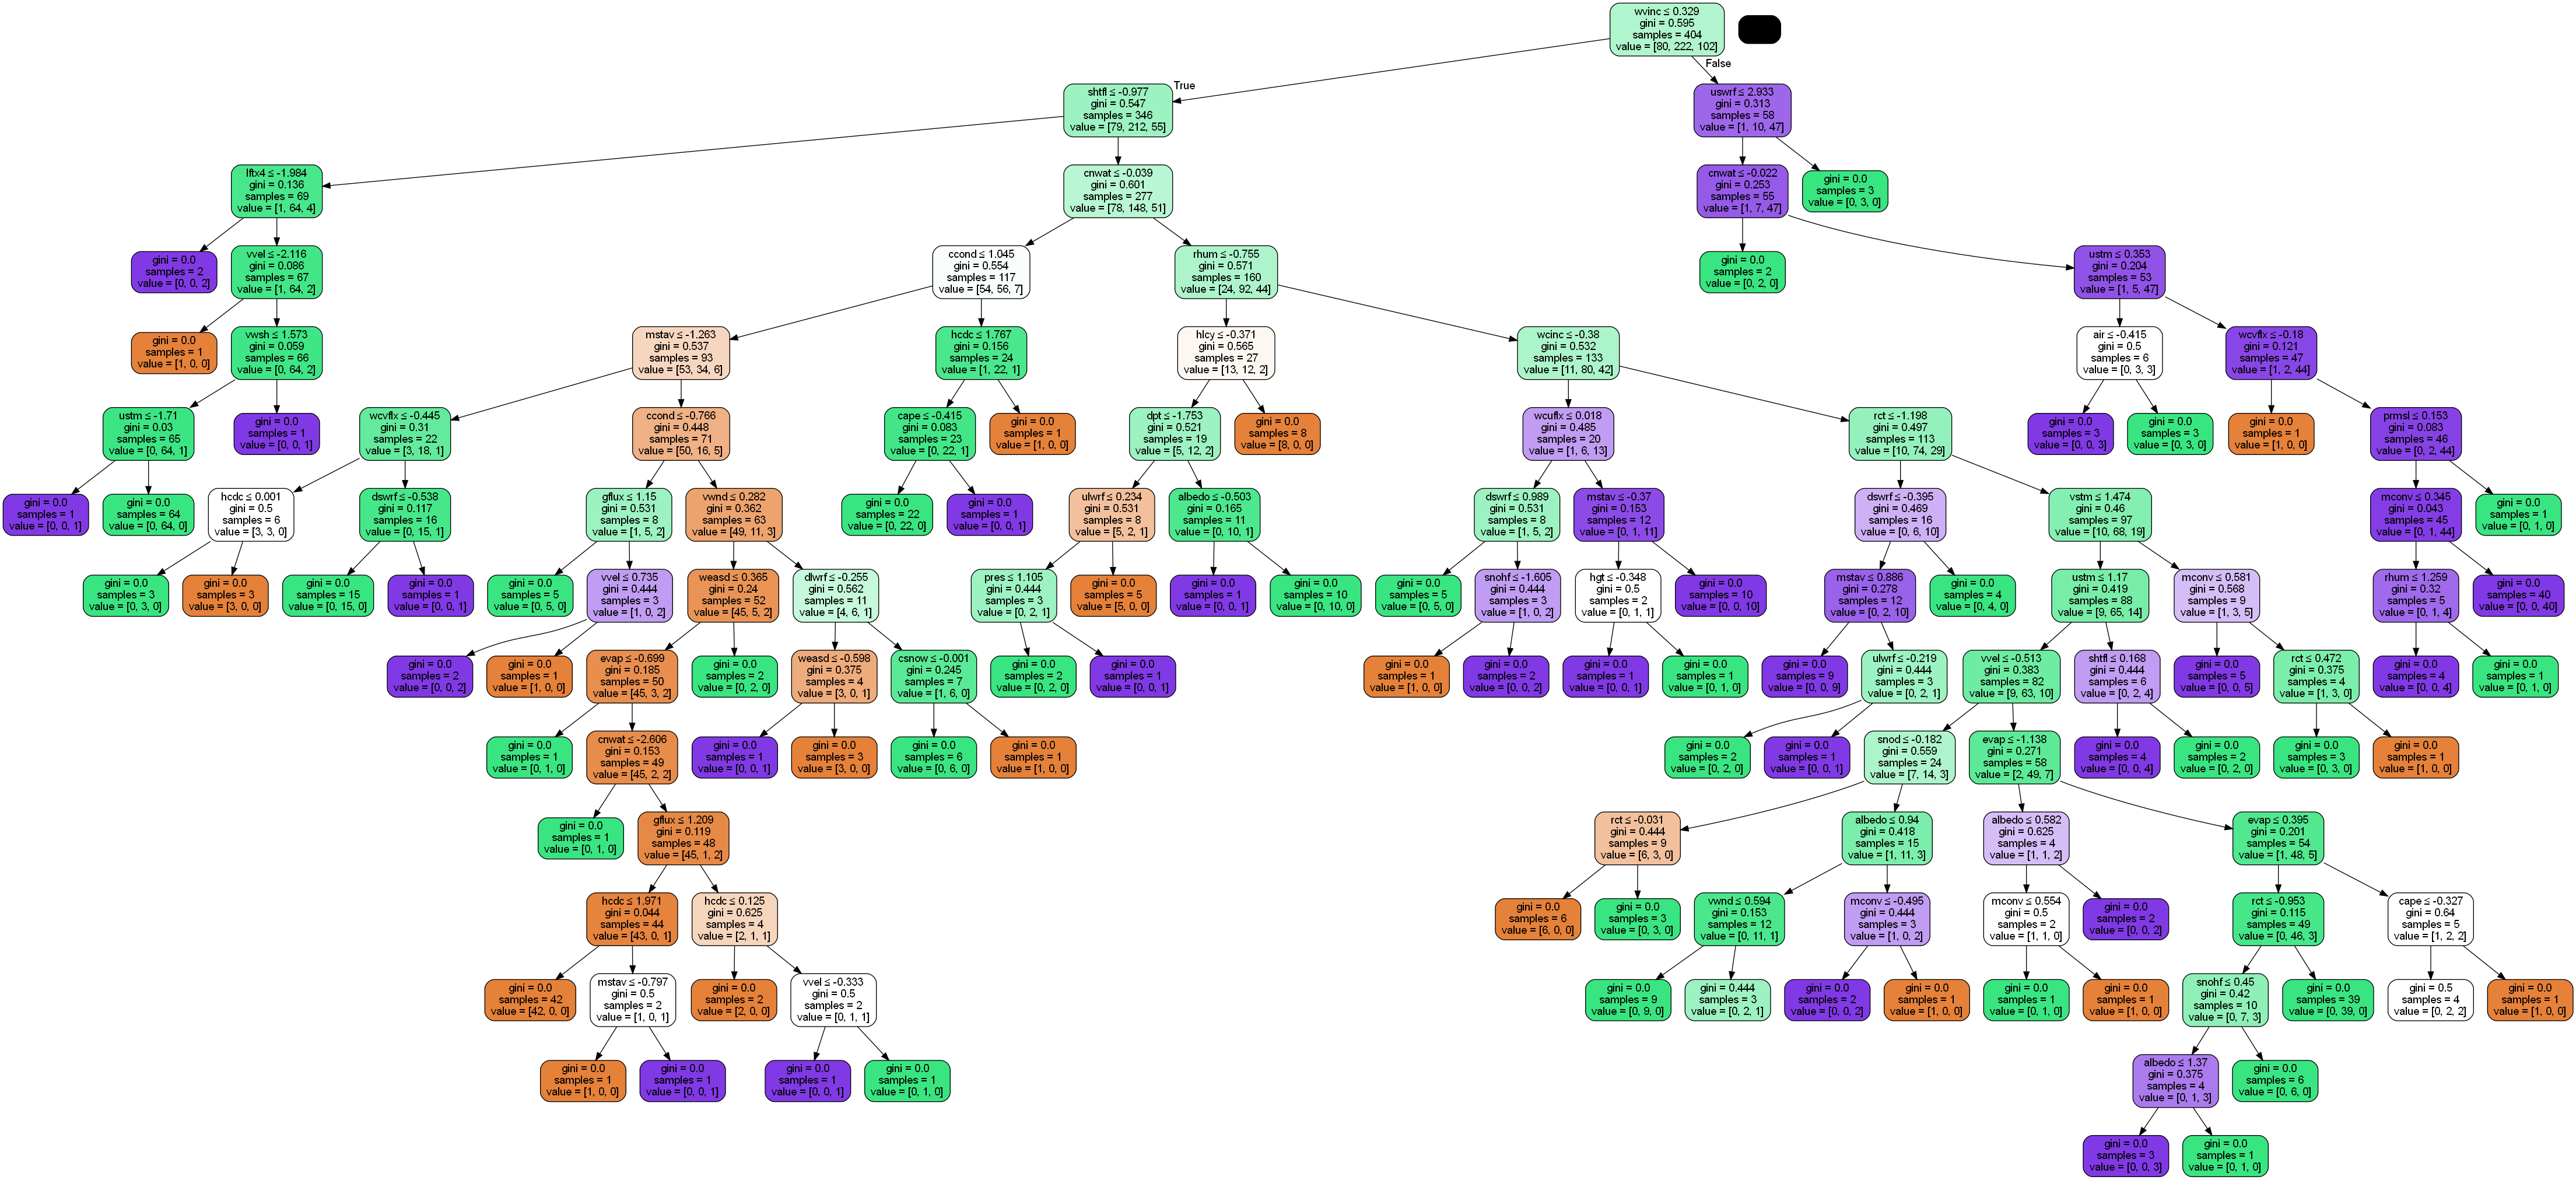

In [60]:
from IPython.display import  Image
import pydotplus
dot_data = StringIO()
size_data = tree.export_graphviz(clf, out_file=dot_data,
                                 filled=True, rounded=True,
                                 special_characters=True,
                                 feature_names=X_data.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('size.png')
Image(graph.create_png())


In [61]:
tree_size_accuracy = metrics.accuracy_score(y_test['size'], tree_size_pred)
print(tree_size_accuracy)

0.6379310344827587


Pruning tree to reduce overfitting my limiting max depth

In [62]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_size)
tree_size_pred = clf.predict(X_test)
tree_size_accuracy = metrics.accuracy_score(y_test['size'], tree_size_pred)
print(tree_size_accuracy)

0.6091954022988506


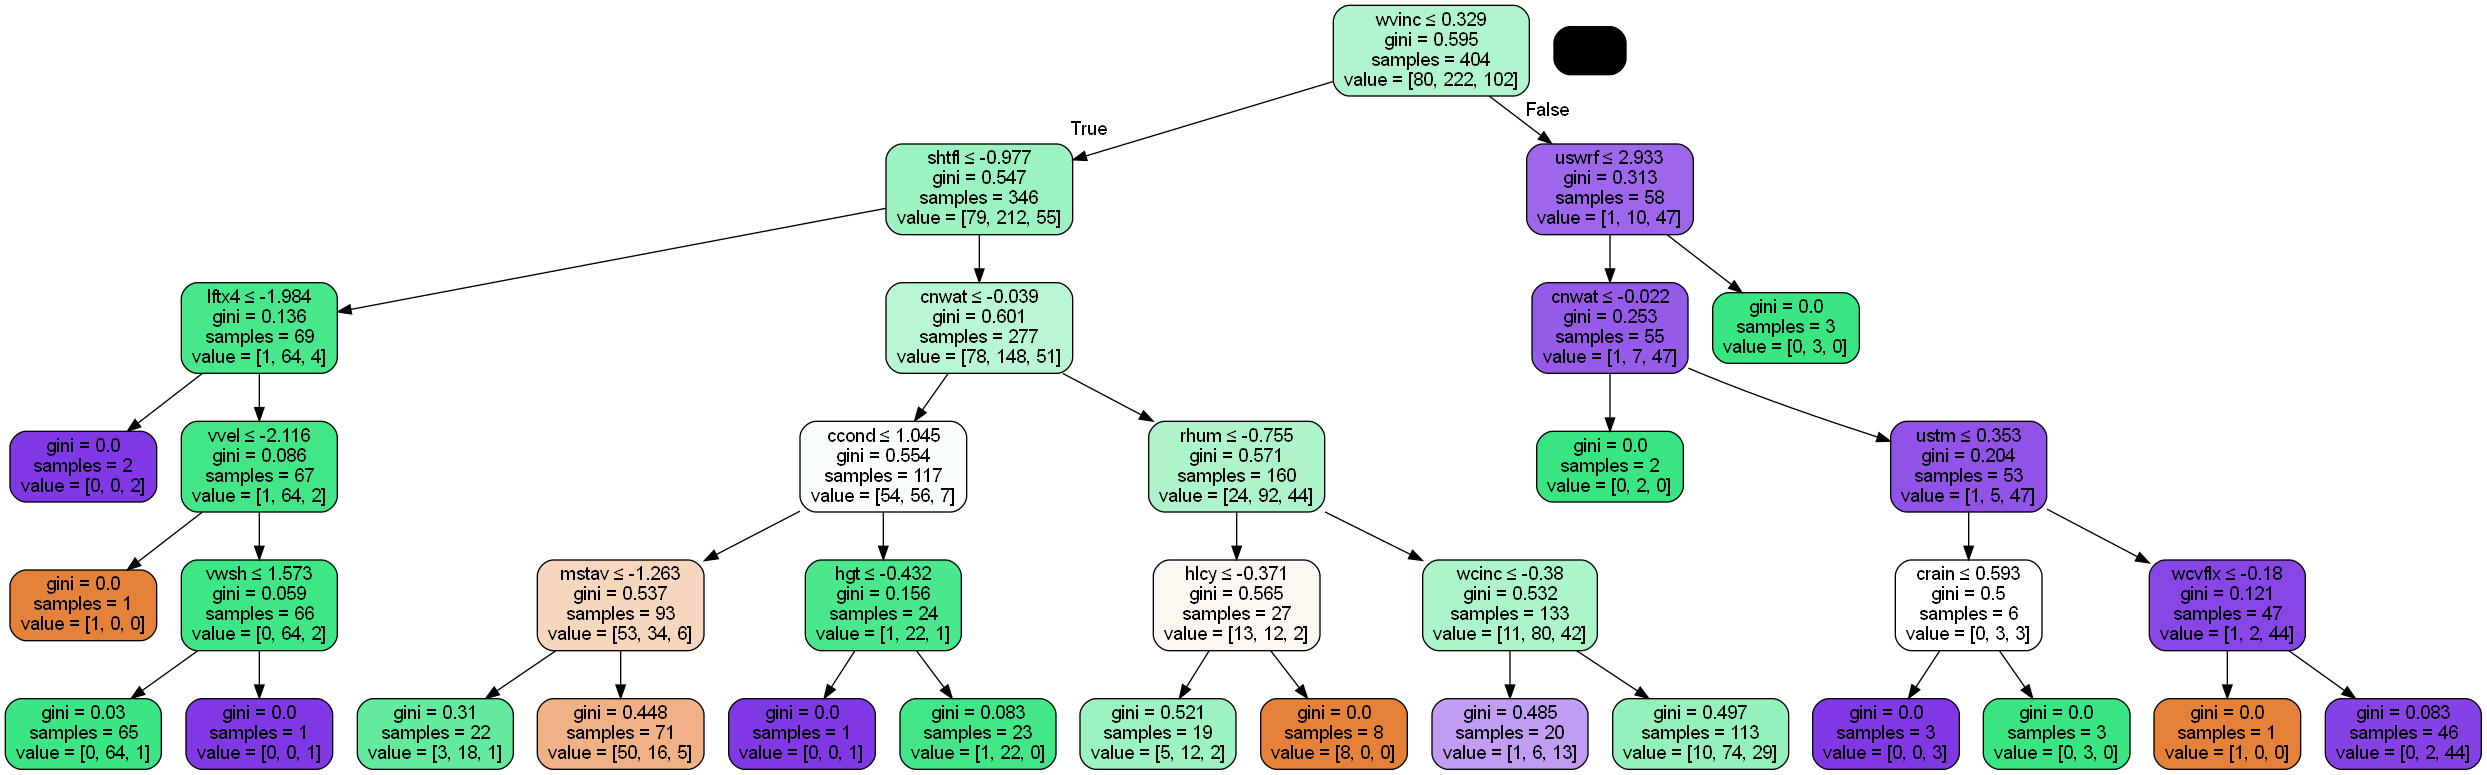

In [63]:
dot_data = StringIO()
size_data = tree.export_graphviz(clf, out_file=dot_data,
                                 filled=True, rounded=True,
                                 special_characters=True,
                                 feature_names=X_data.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('size.png')
Image(graph.create_png())


Reduce dimensionality using PCA to reduce overfitting by the tree

In [64]:
print(len(X_data.columns))

59


In [65]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_var_meas = PCA(n_components=len(X_data.columns), random_state=2023)
pca_var_meas.fit(X_scaled)
X_pca_var_meas = pca_var_meas.transform(X_scaled)
print("Variance in all 59 features (should be 100%): ", sum(pca_var_meas.explained_variance_ratio_ * 100))

Variance in all 59 features (should be 100%):  100.00000000000004


Visualizing which components make up most of variation

In [66]:
pca_var_meas.explained_variance_ratio_ * 100

array([3.44451050e+01, 1.42116334e+01, 8.15866329e+00, 6.74689239e+00,
       4.64957082e+00, 3.70694259e+00, 3.59538187e+00, 2.59524648e+00,
       2.42563507e+00, 1.98662699e+00, 1.54791780e+00, 1.51257996e+00,
       1.46343383e+00, 1.15855786e+00, 1.11118738e+00, 1.06682979e+00,
       9.79467582e-01, 8.61630342e-01, 8.13585752e-01, 7.53135739e-01,
       6.68218252e-01, 6.28976328e-01, 4.79829615e-01, 4.73346404e-01,
       4.16499263e-01, 3.66623943e-01, 3.37549669e-01, 3.09347270e-01,
       2.99643328e-01, 2.47980315e-01, 2.35557159e-01, 1.99869013e-01,
       1.72455925e-01, 1.61771034e-01, 1.48851922e-01, 1.28354153e-01,
       1.20473746e-01, 1.09328465e-01, 1.00583119e-01, 8.34099016e-02,
       7.19361382e-02, 6.17986831e-02, 5.27193903e-02, 5.10591482e-02,
       4.66022936e-02, 4.05685919e-02, 3.69580181e-02, 3.14839167e-02,
       2.77893806e-02, 2.30619288e-02, 2.12012827e-02, 1.41301572e-02,
       1.31822636e-02, 9.57044805e-03, 8.34923390e-03, 6.54224454e-03,
      

First feature alone explains 34% of the variance in the dataset


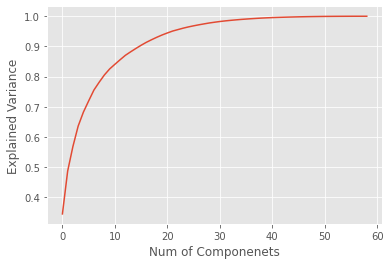

In [67]:
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')
np.cumsum(pca_var_meas.explained_variance_ratio_ * 100)
plt.plot(np.cumsum(pca_var_meas.explained_variance_ratio_))
plt.xlabel('Num of Componenets')
plt.ylabel('Explained Variance')
plt.savefig('pca_elbow_plot.png', dpi=100)

Understanding results of our dimensionality reduction:
   -   Around 35 features explain roughly 99% of all the variance in our data
   -   Reducing our data to 2D explains roughly only 50% of the variance in our data
   -   3D explains roughly 60%


Now let us reduce our dimensionality to reduce overfitting of our
decision tree while still retaining 99% of our data variance

In [68]:
pca_95 = PCA(n_components=.99, random_state=2023)
pca_95.fit(X_scaled)
X_pca_95 = pca_95.transform(X_scaled)
X_pca_95.shape

## split into train and test
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_95, Y_data, test_size=0.30)


In [69]:
pca_clf = tree.DecisionTreeClassifier()
pca_clf.fit(X_train_pca, y_size)
pca_y_size_pred = pca_clf.predict(X_test_pca)
tree_size_accuracy = metrics.accuracy_score(y_test['size'], tree_size_pred)
pca_acc = metrics.accuracy_score(y_test['size'], pca_y_size_pred)
print(pca_acc)

0.3850574712643678


Likelihoood

avalanche likelihood accuracy:  0.603448275862069


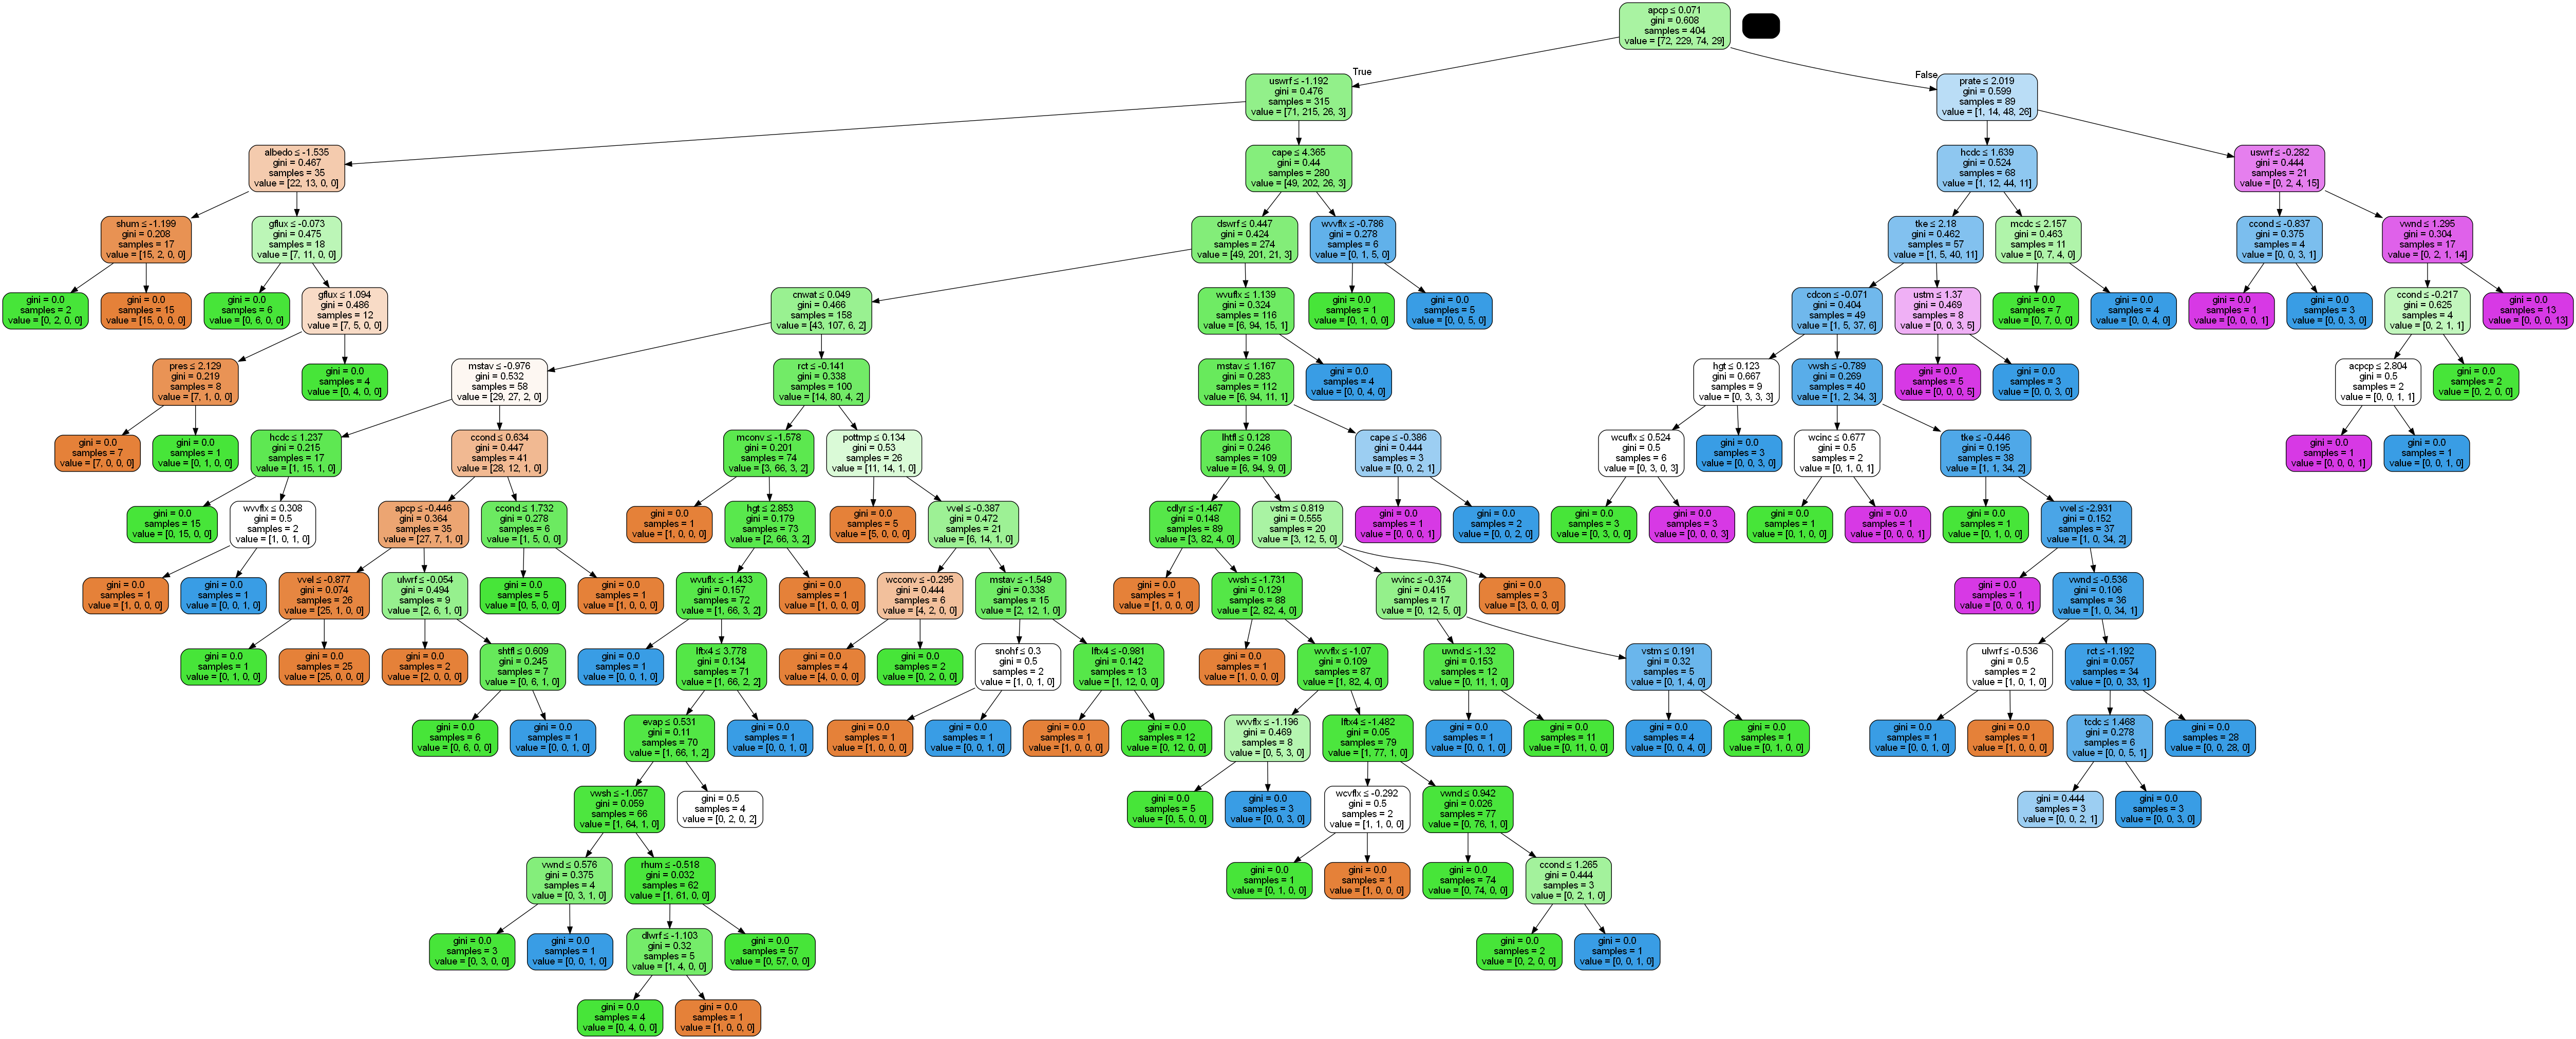

In [81]:
# y_likelihood
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_likelihood)
tree_likelihood_pred = clf.predict(X_test)

## accuracy ##
tree_likelihood_accuracy = metrics.accuracy_score(y_test['likelihood'], tree_likelihood_pred)
print("avalanche likelihood accuracy: ", tree_likelihood_accuracy)


## visualization ##
likelihood_data = tree.export_graphviz(clf, out_file=None)

dot_data = StringIO()
likelihood_data = tree.export_graphviz(clf, out_file=dot_data,
                                 filled=True, rounded=True,
                                 special_characters=True,
                                 feature_names=X_data.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('avalanche_likelihood.png')
Image(graph.create_png())

avalanche likelihood accuracy:  0.6724137931034483


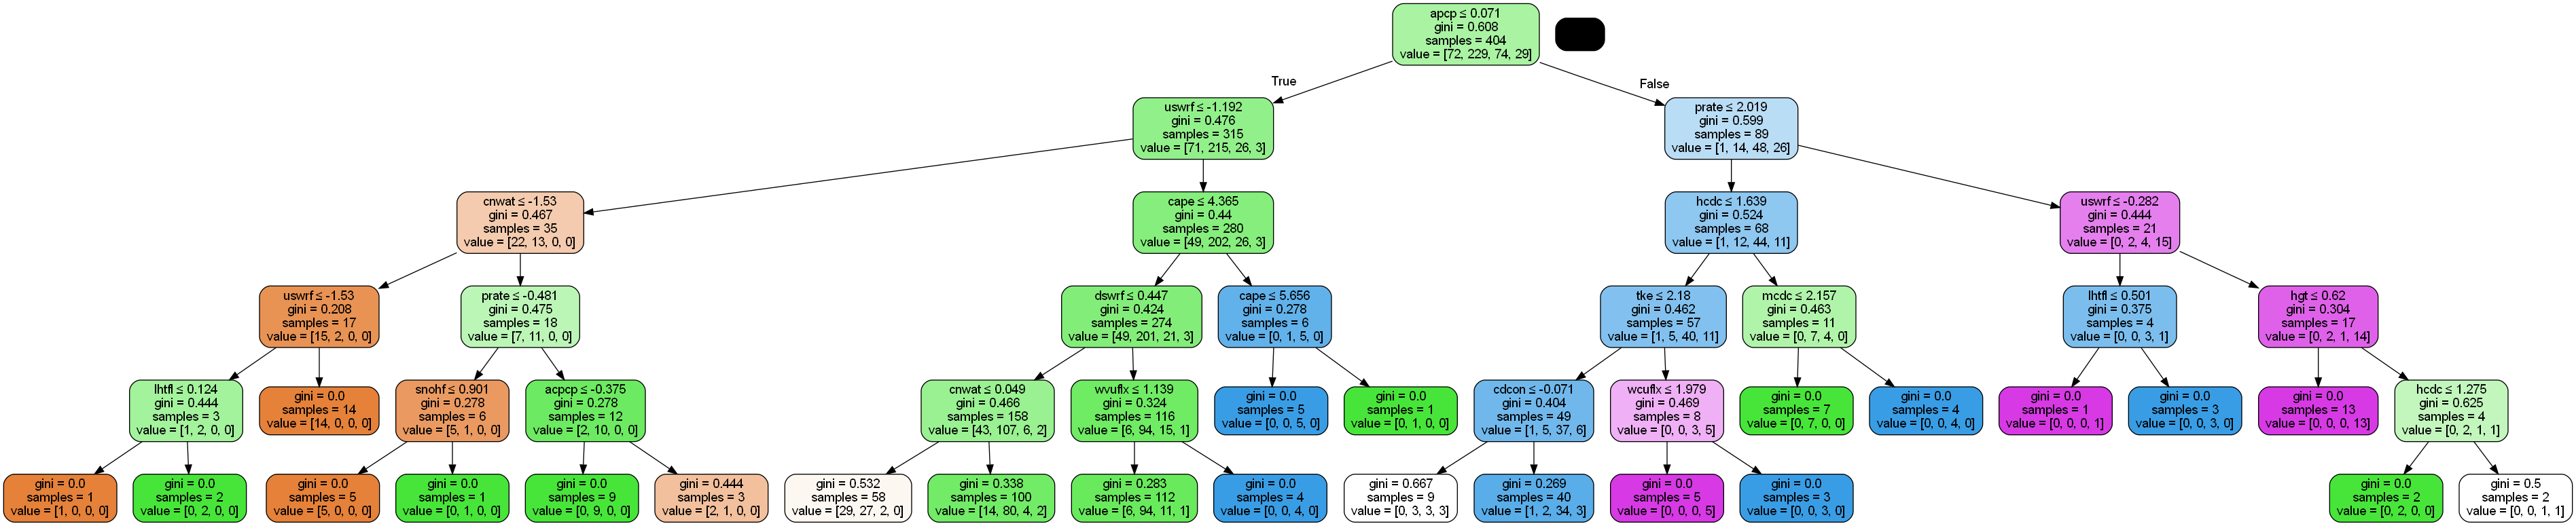

In [82]:
## limiting our max depth ##
# y_likelihood
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_likelihood)
tree_likelihood_pred = clf.predict(X_test)

## accuracy ##
tree_likelihood_accuracy = metrics.accuracy_score(y_test['likelihood'], tree_likelihood_pred)
print("avalanche likelihood accuracy: ", tree_likelihood_accuracy)


## visualization ##
likelihood_data = tree.export_graphviz(clf, out_file=None)

dot_data = StringIO()
likelihood_data = tree.export_graphviz(clf, out_file=dot_data,
                                       filled=True, rounded=True,
                                       special_characters=True,
                                       feature_names=X_data.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('avalanche_likelihood.png')
Image(graph.create_png())

avalanche likelihood accuracy:  0.6379310344827587


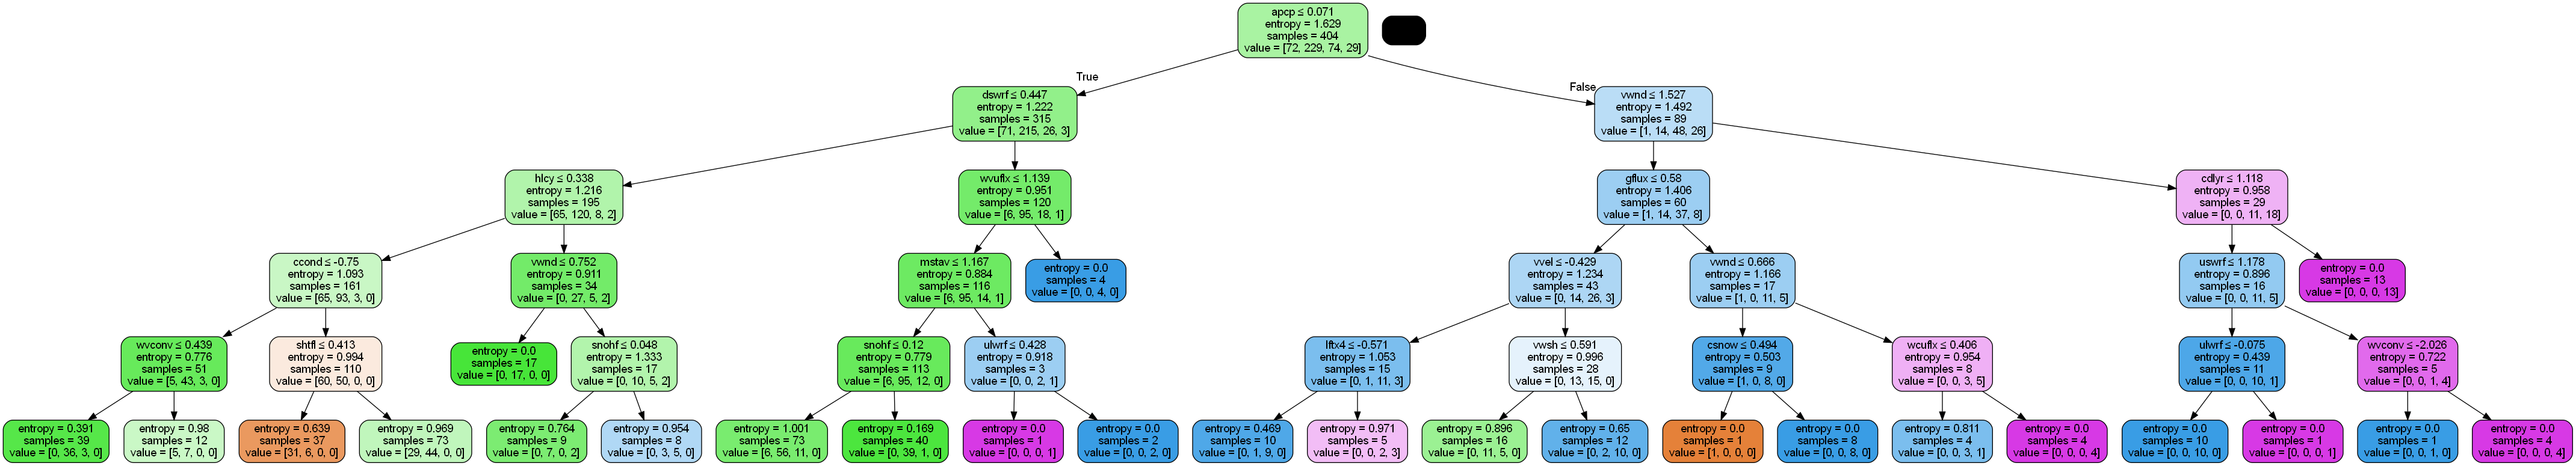

In [83]:
## using entropy ##
## limiting our max depth ##
# y_likelihood
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(X_train, y_likelihood)
tree_likelihood_pred = clf.predict(X_test)

## accuracy ##
tree_likelihood_accuracy = metrics.accuracy_score(y_test['likelihood'], tree_likelihood_pred)
print("avalanche likelihood accuracy: ", tree_likelihood_accuracy)


## visualization ##
likelihood_data = tree.export_graphviz(clf, out_file=None)

dot_data = StringIO()
likelihood_data = tree.export_graphviz(clf, out_file=dot_data,
                                       filled=True, rounded=True,
                                       special_characters=True,
                                       feature_names=X_data.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('avalanche_likelihood.png')
Image(graph.create_png())

Problem Type

Problem type accuracy using decision trees:  0.6896551724137931
Reducing dimensionality using PCA: 
Accuracy after reducing dimensionality for problem type:  0.3793103448275862
Tree using PCA: 

(process:24780): GLib-GIO-WARNING **: 19:41:15.533: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.5.15.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:24780): GLib-GIO-WARNING **: 19:41:15.544: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2302.20.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs


(process:3684): GLib-GIO-WARNING **: 19:41:16.637: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.5.15.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:3684): GLib-GIO-WARNING **: 19:41:16.646: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2302.20.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.

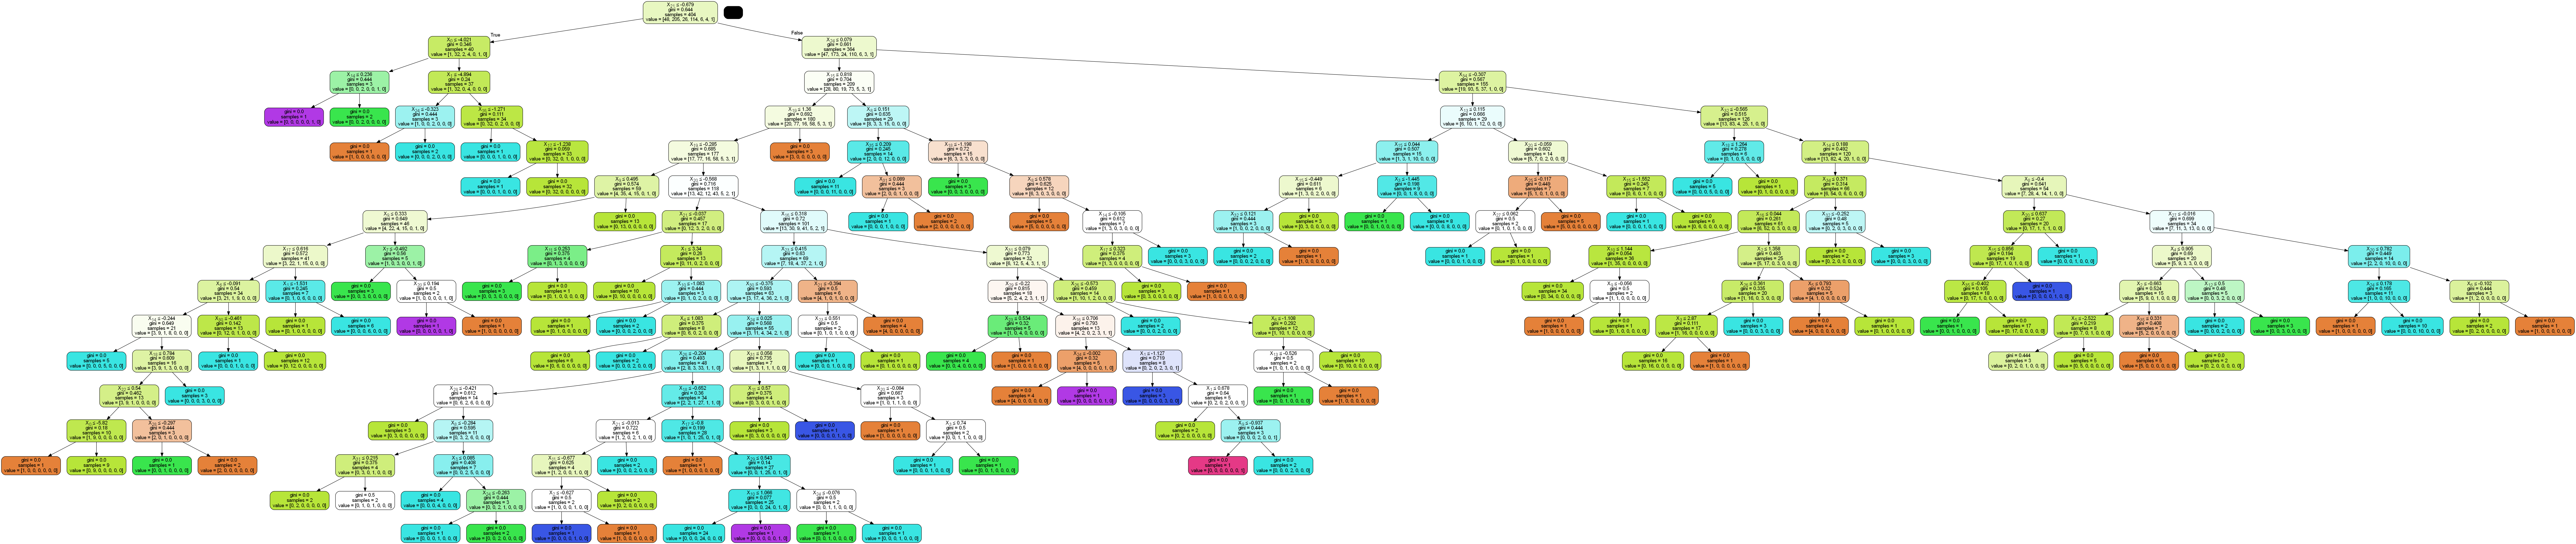

In [75]:
## Basic decision tree ##

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_type)
tree_type_pred = clf.predict(X_test)
type_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(type_data)
graph

## visualizations ##
dot_data = StringIO()
type_data = tree.export_graphviz(clf, out_file=dot_data,
                                 filled=True, rounded=True,
                                 special_characters=True,
                                 feature_names=X_data.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('problem_type.png')
Image(graph.create_png())

## accuracy score ##
tree_type_accuracy = metrics.accuracy_score(y_test['type'], tree_type_pred)
print("Problem type accuracy using decision trees: ", tree_type_accuracy)

## reducing dimensionality to retain 99% of variance within dataset ##
print("Reducing dimensionality using PCA: ")
pca_clf = tree.DecisionTreeClassifier()
pca_clf.fit(X_train_pca, y_type)
pca_y_type_pred = pca_clf.predict(X_test_pca)
tree_size_accuracy = metrics.accuracy_score(y_test['type'], tree_type_pred)
pca_acc = metrics.accuracy_score(y_test['type'], pca_y_size_pred)
print("Accuracy after reducing dimensionality for problem type: ", pca_acc)


## visualization ##
print("Tree using PCA: ")

dot_data = StringIO()
type_data_pca = tree.export_graphviz(pca_clf, out_file=dot_data,
                                 filled=True, rounded=True,
                                 special_characters=True,
                                 )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('problem_type_pca.png')
Image(graph.create_png())


Problem Type restricting max depth

Problem type accuracy using decision trees with max depth of 5:  0.7011494252873564


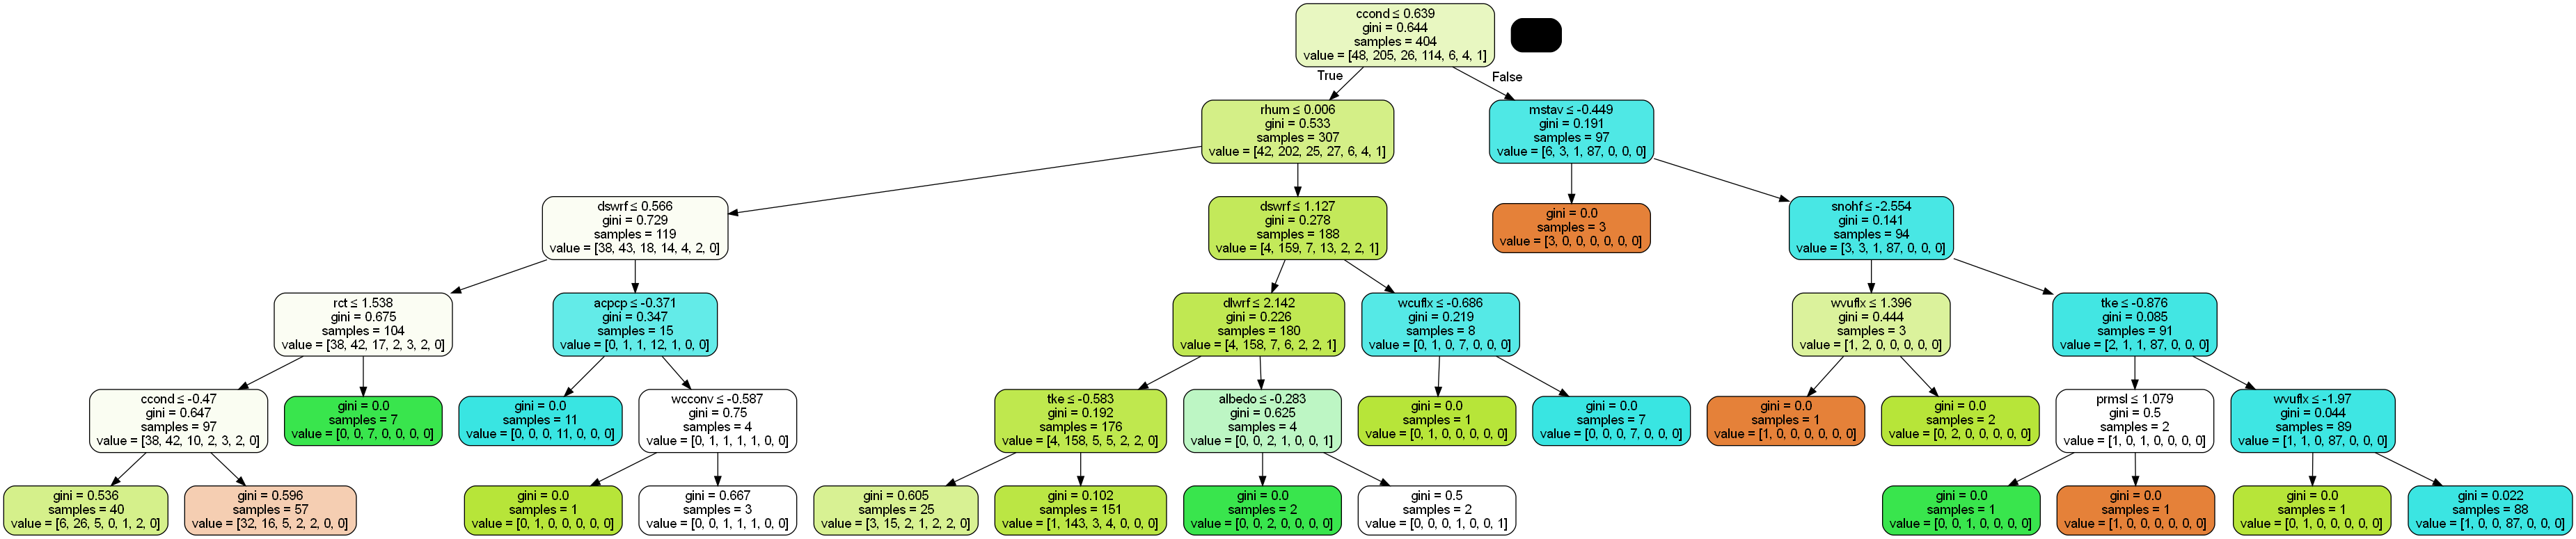

In [78]:
### setting max depths
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_type)
tree_type_pred = clf.predict(X_test)
type_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(type_data)
graph

## visualizations ##
tree_type_accuracy = metrics.accuracy_score(y_test['type'], tree_type_pred)
print("Problem type accuracy using decision trees with max depth of 5: ", tree_type_accuracy)


dot_data = StringIO()
type_data = tree.export_graphviz(clf, out_file=dot_data,
                                 filled=True, rounded=True,
                                 special_characters=True,
                                 feature_names=X_data.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('problem_type_depth_5.png')
Image(graph.create_png())

Reducing dimensionality using PCA: 
Accuracy after reducing dimensionality for problem type:  0.3793103448275862
Tree using PCA: 


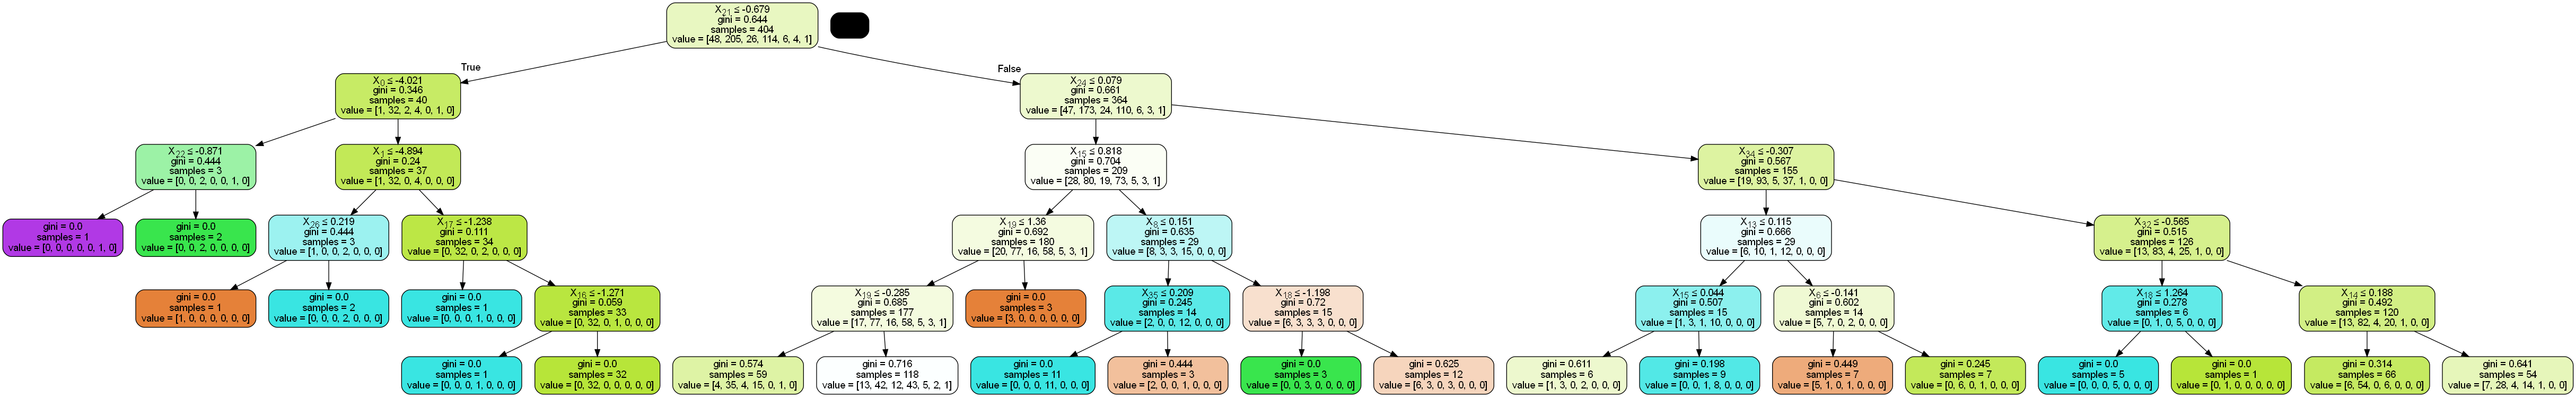

In [79]:
## now lets restrict the depth of our tree
##  when reducing our dimensionality
##      preventing OVERFITTING

print("Reducing dimensionality using PCA: ")
pca_clf = tree.DecisionTreeClassifier(max_depth=5)
pca_clf.fit(X_train_pca, y_type)
pca_y_type_pred = pca_clf.predict(X_test_pca)
tree_size_accuracy = metrics.accuracy_score(y_test['type'], tree_type_pred)
pca_acc = metrics.accuracy_score(y_test['type'], pca_y_size_pred)
print("Accuracy after reducing dimensionality for problem type: ", pca_acc)

print("Tree using PCA: ")

dot_data = StringIO()
type_data_pca = tree.export_graphviz(pca_clf, out_file=dot_data,
                                     filled=True, rounded=True,
                                     special_characters=True,
                                     )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('problem_type_pca_5.png')
Image(graph.create_png())


Conclusions:
   - Reducing our dimensionality, while making our algorithm marginally quicker and more efficient, reduces our accuracy substantially
      - With avalanche forecasting, accuracy trumps efficiency
   - Reducing the max depth of the tree increases both accuracy and efficiency marginally
      - Further research can find optimal max depth for these decision trees
            - will probably vary depending on the feature being predicted


avalanche above treeline accuracy:  0.6206896551724138
avalanche near treeline accuracy:  0.6379310344827587
avalanche below treeline accuracy:  0.5747126436781609


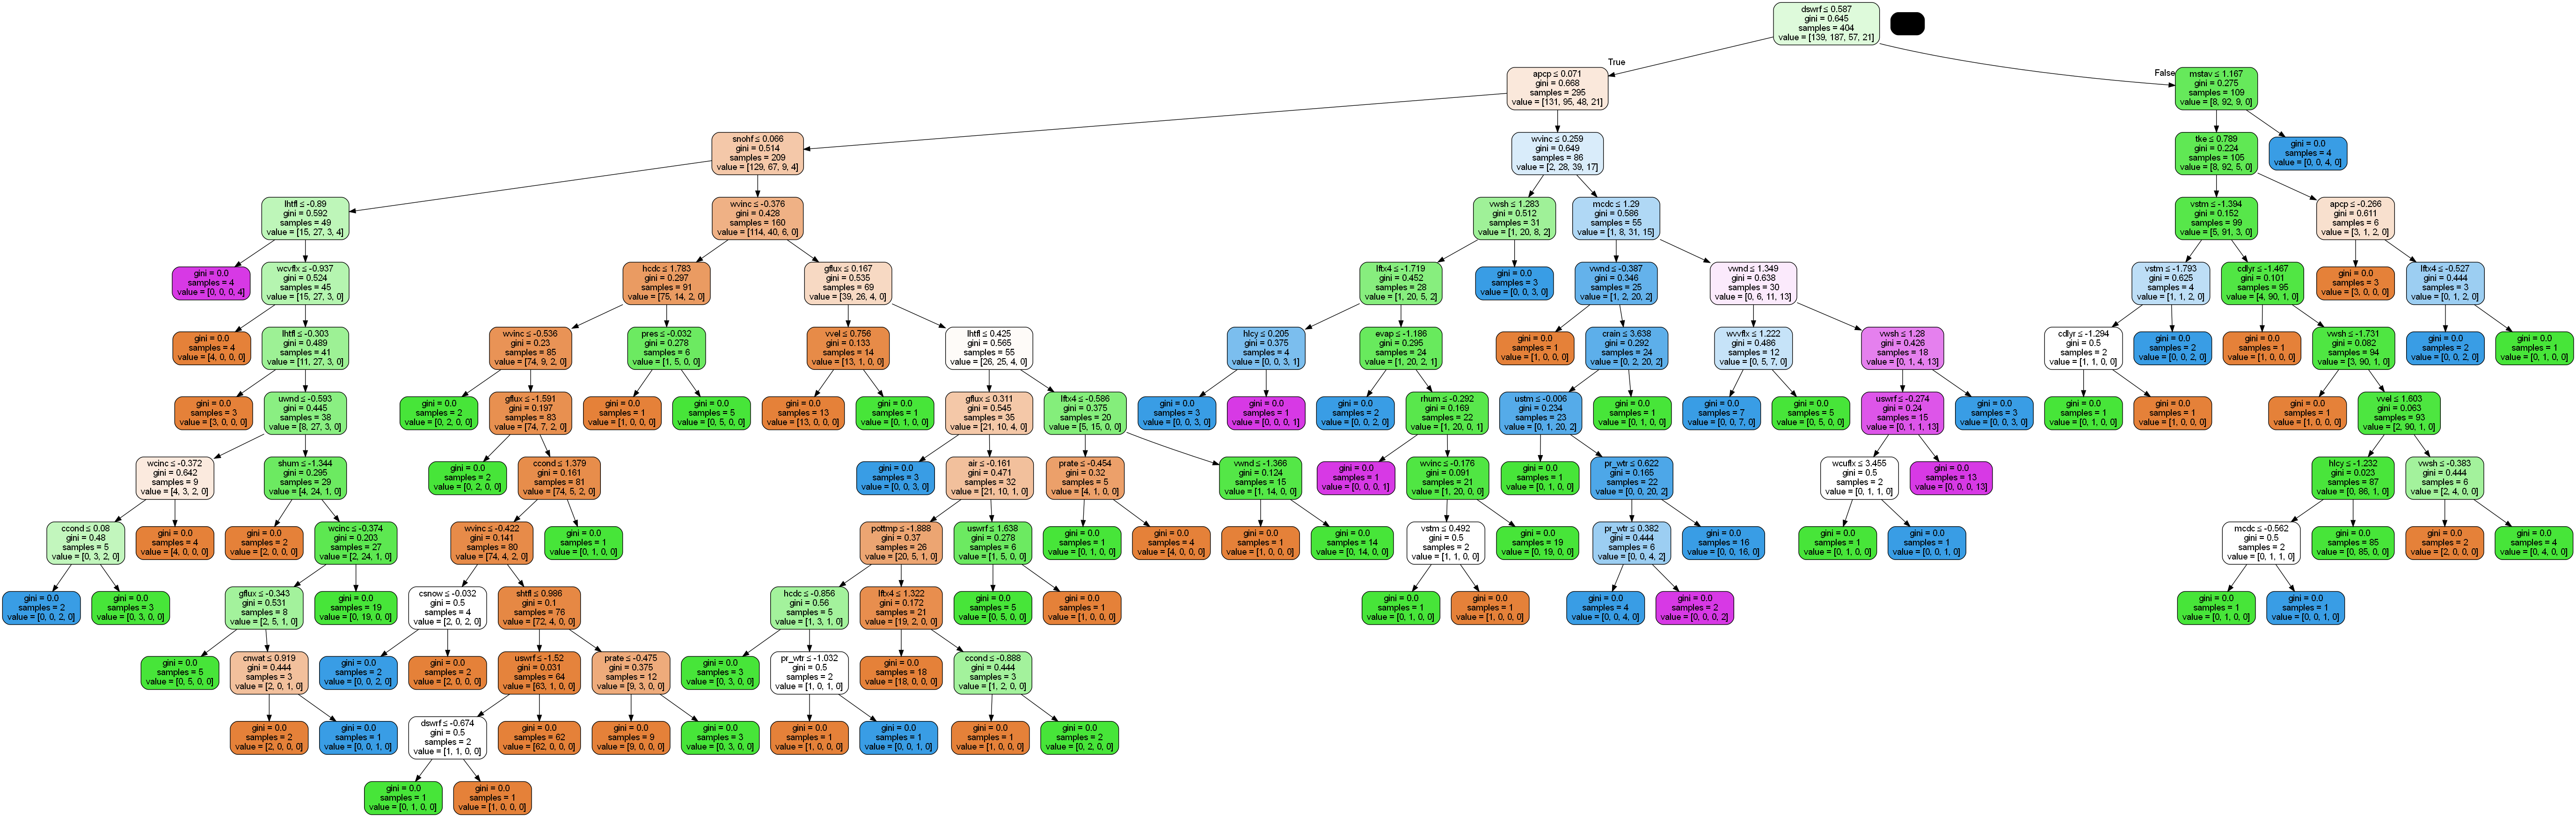

In [88]:
##### ELEVATION PREDICTIONS #####
# elevation y variable feature list:
# y_atl
# y_ntl
# y_btl

## above treeline ##

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_atl)
tree_atl_pred = clf.predict(X_test)

## accuracy ##
tree_atl_accuracy = metrics.accuracy_score(y_test['atl'], tree_atl_pred)
print("avalanche above treeline accuracy: ", tree_atl_accuracy)

## visualization ##
dot_data = StringIO()
atl_data = tree.export_graphviz(clf, out_file=dot_data,
                                       filled=True, rounded=True,
                                       special_characters=True,
                                       feature_names=X_data.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('avalanche_above_treeline.png')
Image(graph.create_png())

## end above treeline ##

## near treeline ##

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_ntl)
tree_ntl_pred = clf.predict(X_test)

## accuracy ##
tree_ntl_accuracy = metrics.accuracy_score(y_test['ntl'], tree_ntl_pred)
print("avalanche near treeline accuracy: ", tree_ntl_accuracy)

## visualization ##
dot_data = StringIO()
ntl_data = tree.export_graphviz(clf, out_file=dot_data,
                                filled=True, rounded=True,
                                special_characters=True,
                                feature_names=X_data.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('avalanche_near_treeline.png')
Image(graph.create_png())

## end near treeline ##

## below treeline ##

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_btl)
tree_btl_pred = clf.predict(X_test)

## accuracy ##
tree_btl_accuracy = metrics.accuracy_score(y_test['btl'], tree_btl_pred)
print("avalanche below treeline accuracy: ", tree_btl_accuracy)

## visualization ##
dot_data = StringIO()
btl_data = tree.export_graphviz(clf, out_file=dot_data,
                                filled=True, rounded=True,
                                special_characters=True,
                                feature_names=X_data.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('avalanche_below_treeline.png')
Image(graph.create_png())

## end below treeline ##

##### ASPECT PREDICTIONS #####
# y_train_asp = y_train.iloc[:, 6:14]
# y_test_asp = y_test.iloc[:, 6:14]
#
# for feature in aspect:
#     model = svm.SVC()
#     model.fit(X_train, y_train_asp[feature])
#     preds = model.predict(X_test)
#     score = accuracy_score(y_test[feature], preds)
#     print(feature + ": ", score)

avalanche above treeline accuracy:  0.6666666666666666
avalanche near treeline accuracy:  0.6436781609195402
avalanche below treeline accuracy:  0.6206896551724138


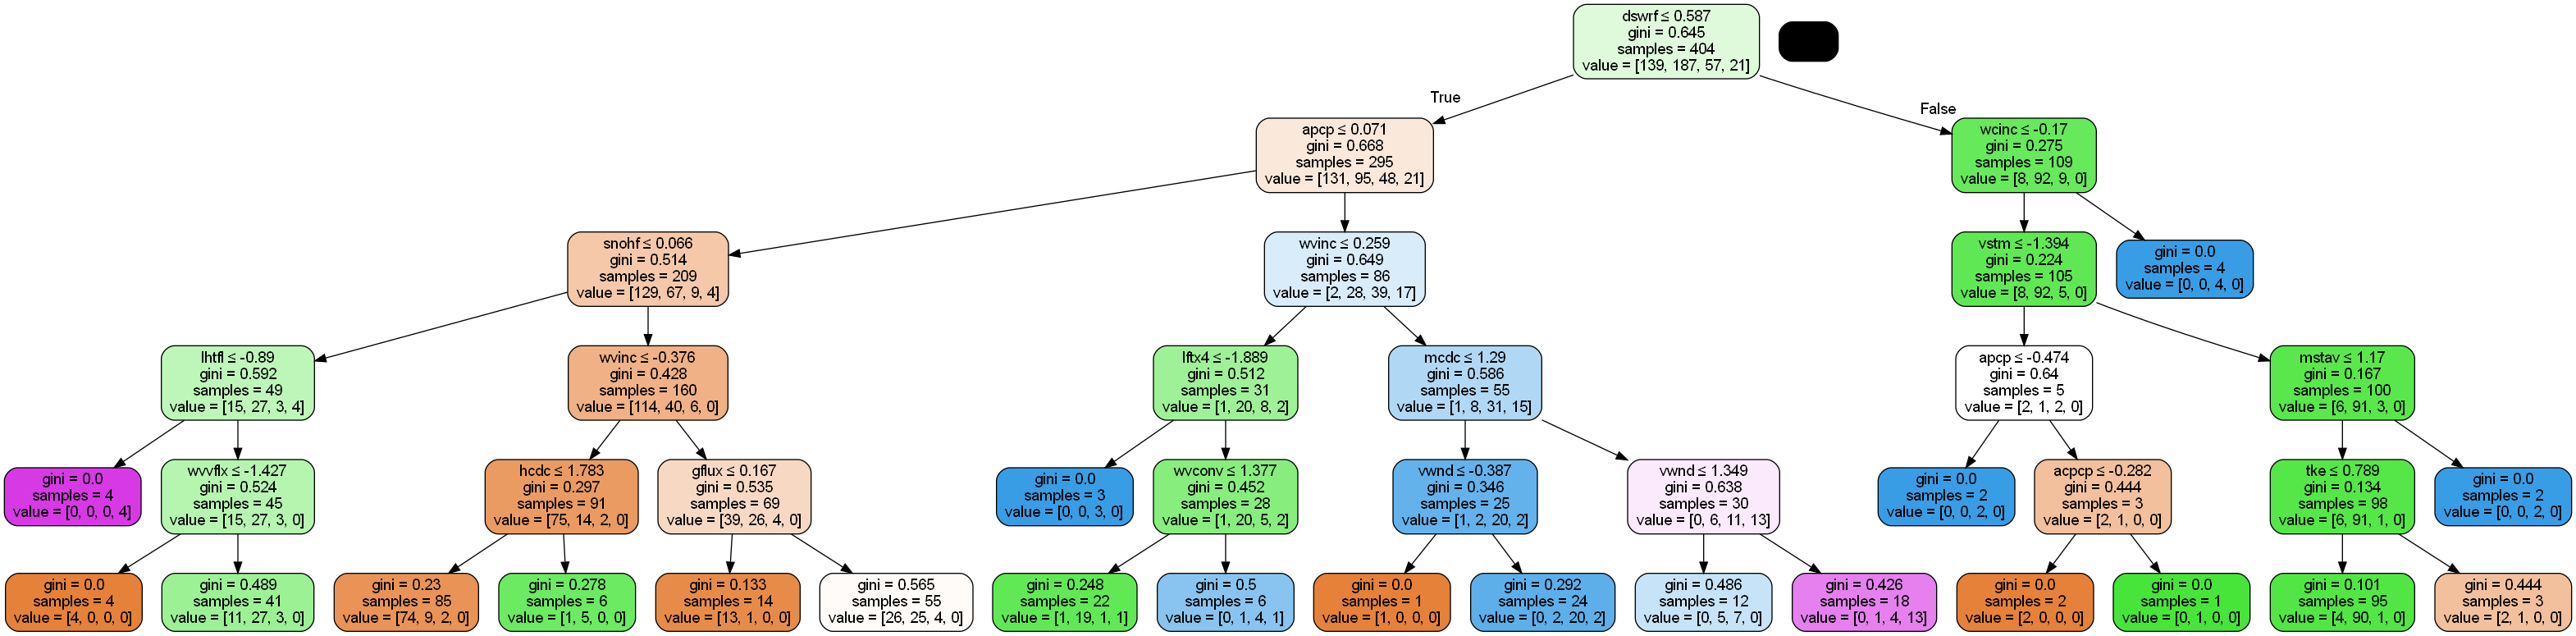

In [89]:
##### ELEVATION PREDICTIONS restricting tree depth #####
# elevation y variable feature list:
# y_atl
# y_ntl
# y_btl

## above treeline ##

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_atl)
tree_atl_pred = clf.predict(X_test)

## accuracy ##
tree_atl_accuracy = metrics.accuracy_score(y_test['atl'], tree_atl_pred)
print("avalanche above treeline accuracy: ", tree_atl_accuracy)

## visualization ##
dot_data = StringIO()
atl_data = tree.export_graphviz(clf, out_file=dot_data,
                                filled=True, rounded=True,
                                special_characters=True,
                                feature_names=X_data.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('avalanche_above_treeline_d5.png')
Image(graph.create_png())

## end above treeline ##

## near treeline ##

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_ntl)
tree_ntl_pred = clf.predict(X_test)

## accuracy ##
tree_ntl_accuracy = metrics.accuracy_score(y_test['ntl'], tree_ntl_pred)
print("avalanche near treeline accuracy: ", tree_ntl_accuracy)

## visualization ##
dot_data = StringIO()
ntl_data = tree.export_graphviz(clf, out_file=dot_data,
                                filled=True, rounded=True,
                                special_characters=True,
                                feature_names=X_data.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('avalanche_near_treeline_d5.png')
Image(graph.create_png())

## end near treeline ##

## below treeline ##

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_btl)
tree_btl_pred = clf.predict(X_test)

## accuracy ##
tree_btl_accuracy = metrics.accuracy_score(y_test['btl'], tree_btl_pred)
print("avalanche below treeline accuracy: ", tree_btl_accuracy)

## visualization ##
dot_data = StringIO()
btl_data = tree.export_graphviz(clf, out_file=dot_data,
                                filled=True, rounded=True,
                                special_characters=True,
                                feature_names=X_data.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('avalanche_below_treeline_d5.png')
Image(graph.create_png())

## end below treeline ##


In [91]:
##### Predictions on aspects #####
# Format test set.
aspect = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
y_train_asp = y_train.iloc[:, 6:14]
y_test_asp = y_test.iloc[:, 6:14]

for feature in aspect:
    ## model ##
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train_asp[feature])
    tree_asp_pred = clf.predict(X_test)

    ## accuracy ##
    tree_asp_accuracy = metrics.accuracy_score(y_test[feature], tree_asp_pred)
    print("avalanche on aspect", feature, ": ", tree_asp_accuracy)


## limiting depth of tree ##
print("After limiting depth of tree: ")
for feature in aspect:
    ## model ##
    clf = tree.DecisionTreeClassifier(max_depth=5)
    clf = clf.fit(X_train, y_train_asp[feature])
    tree_asp_pred = clf.predict(X_test)

    ## accuracy ##
    tree_asp_accuracy = metrics.accuracy_score(y_test[feature], tree_asp_pred)
    print("avalanche on aspect", feature, ": ", tree_asp_accuracy)

    # model = svm.SVC()
    # model.fit(X_train, y_train_asp[feature])
    # preds = model.predict(X_test)
    # score = accuracy_score(y_test[feature], preds)
    # print(feature + ": ", score)


avalanche on aspect N :  0.8275862068965517
avalanche on aspect NE :  0.8908045977011494
avalanche on aspect E :  0.8793103448275862
avalanche on aspect SE :  0.8620689655172413
avalanche on aspect S :  0.7011494252873564
avalanche on aspect SW :  0.7988505747126436
avalanche on aspect W :  0.7873563218390804
avalanche on aspect NW :  0.8505747126436781
After limiting depth of tree: 
avalanche on aspect N :  0.8505747126436781
avalanche on aspect NE :  0.8793103448275862
avalanche on aspect E :  0.9022988505747126
avalanche on aspect SE :  0.8505747126436781
avalanche on aspect S :  0.6896551724137931
avalanche on aspect SW :  0.7988505747126436
avalanche on aspect W :  0.7988505747126436
avalanche on aspect NW :  0.8908045977011494
